In [27]:
import matplotlib.pyplot as plt
import numpy as np

from nuscenes.nuscenes import NuScenes
from nuscenes.map_expansion.map_api import NuScenesMap
from nuscenes.can_bus.can_bus_api import NuScenesCanBus

dataroot='/data/Datasets/nuscenes'

nusc = NuScenes(version='v1.0-trainval', dataroot=dataroot, verbose=True)
nusc_map = NuScenesMap(dataroot=dataroot, map_name='singapore-onenorth')
nusc_can = NuScenesCanBus(dataroot=dataroot)

Loading NuScenes tables for version v1.0-trainval...
23 category,
8 attribute,
4 visibility,
64386 instance,
12 sensor,
10200 calibrated_sensor,
2631083 ego_pose,
68 log,
850 scene,
34149 sample,
2631083 sample_data,
1166187 sample_annotation,
4 map,
Done loading in 32.930 seconds.
Reverse indexing ...
Done reverse indexing in 9.0 seconds.


In [36]:
#selecting the features we want to use from the CAN data
feature_names = ['steering', 'yaw_rate', 'vehicle_speed', 'utime']
raw_data = nusc_can.get_messages('scene-0931', 'vehicle_monitor')
data = [{k: i[k] for k in feature_names} for i in raw_data]
data = raw_data

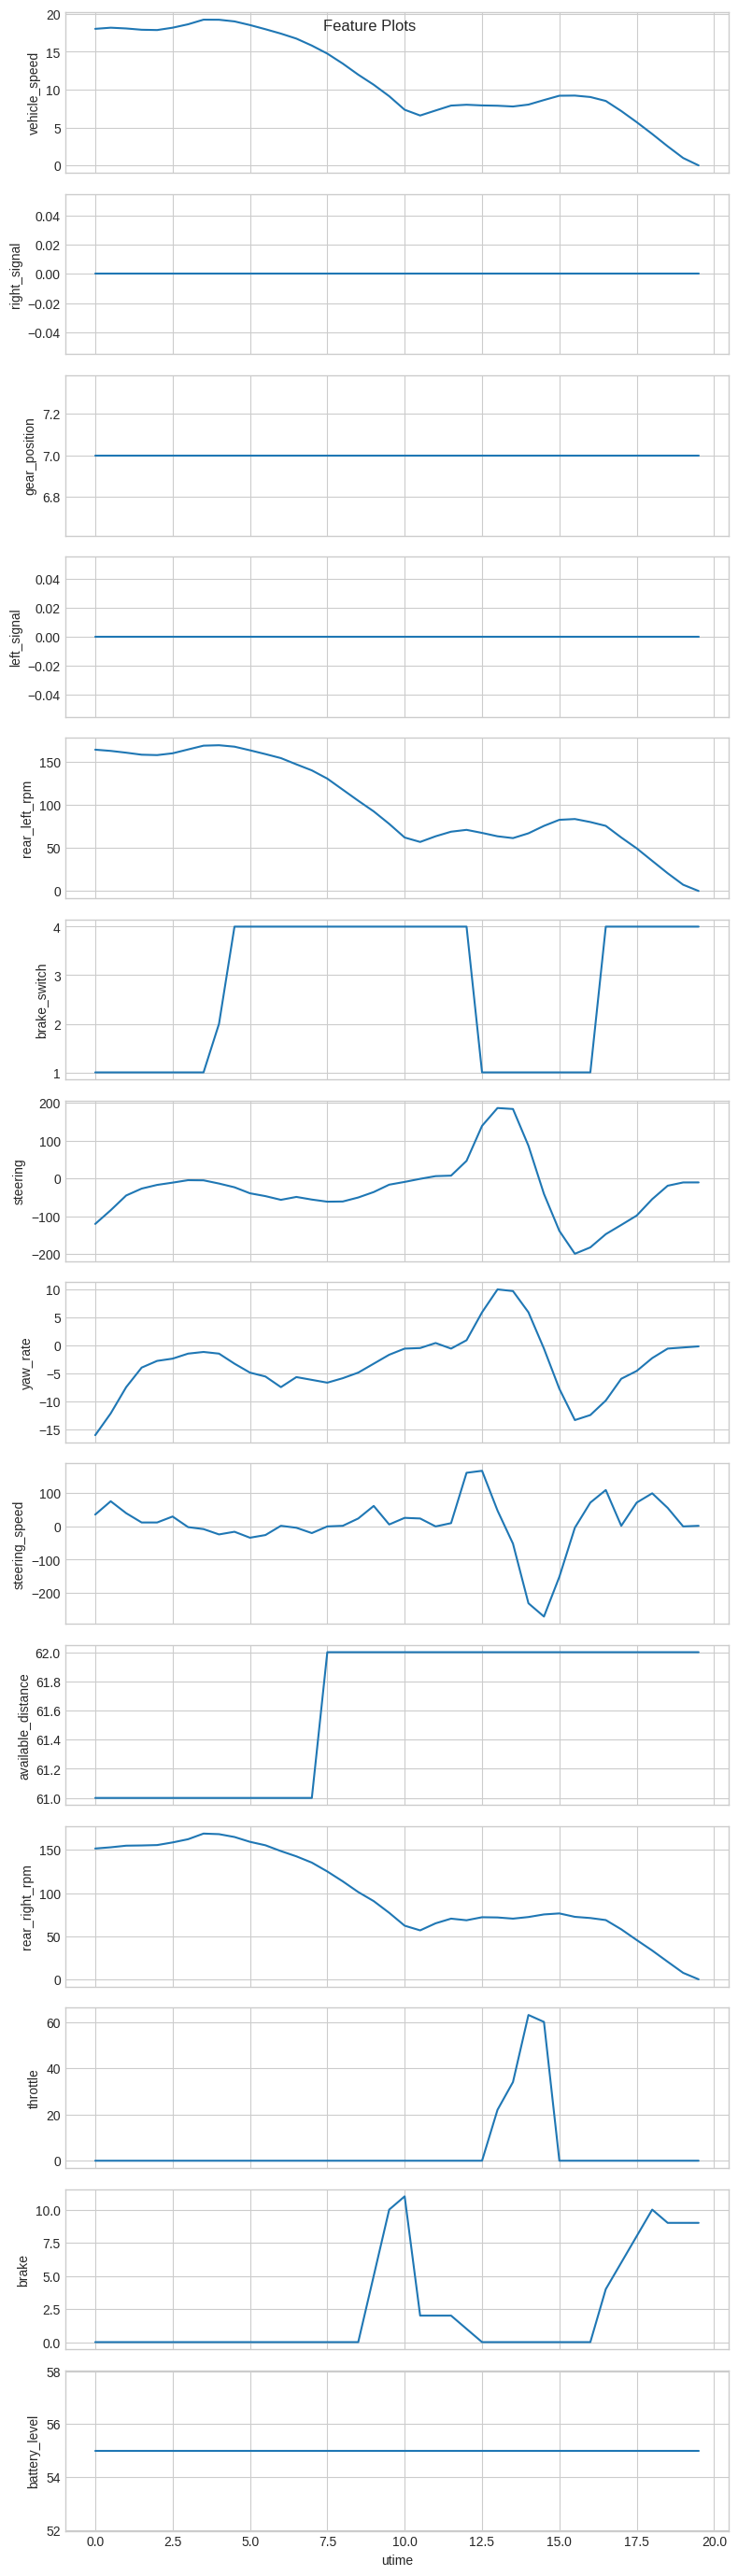

In [37]:

xlabel = 'utime'

# Extract unique feature keys
feature_keys = list(set().union(*(d.keys() for d in data)))
feature_keys.remove(xlabel)  # Remove 'timestamp' key

# Create a figure with subplots
num_subplots = len(feature_keys)
fig, axs = plt.subplots(num_subplots, 1, figsize=(8, 2 * num_subplots), sharex=True)

# Plot each feature in a separate subplot
for i, feature in enumerate(feature_keys):
    x = [d[xlabel] for d in data]
    x = [(i - x[0])*1e-6 for i in x]
    feature_values = [d[feature] for d in data]
    
    if num_subplots == 1:
        ax = axs
    else:
        ax = axs[i]
    
    ax.plot(x, feature_values)
    ax.set_ylabel(feature)

# Set x-axis label and title
axs[-1].set_xlabel(xlabel)
fig.suptitle('Feature Plots')

plt.tight_layout()
plt.show()